### AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="../../logos\aib.png" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---

### Week 3: Deep Learning Basics for Computer Vision

#### Session 9: **Understanding ResNet (Residual Networks)**
### **1. Introduction to ResNet**

ResNet, short for Residual Network, is a type of deep neural network architecture designed to address the problem of training very deep networks. Introduced by Kaiming He et al. in their 2015 paper "Deep Residual Learning for Image Recognition," ResNet won the ImageNet competition by a significant margin. The key innovation of ResNet is the introduction of residual connections, or skip connections, which help in training deep networks more effectively.

Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.

However, increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient extremely small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.



ResNet first introduced the concept of skip connection. The diagram below illustrates skip connection. The figure on the left is stacking convolution layers together one after the other. On the right we still stack convolution layers as before but we now also add the original input to the output of the convolution block. This is called skip connection

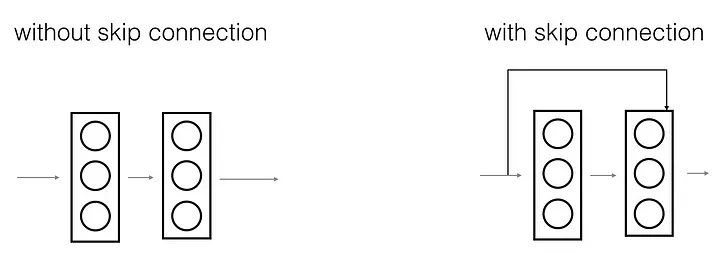

Reproduced from <a href="https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf">He et al 2016.</a>

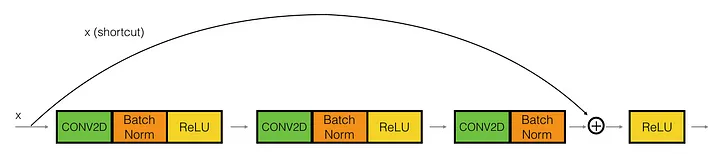

### **2. Key Concepts**

#### **2.1. Convolution**

- **Convolution** is a fundamental operation in CNNs (Convolutional Neural Networks) that involves applying a filter to an input image to produce a feature map. This operation helps in extracting features from the input data.

#### **2.2. Filters**

- **Filters** (also known as kernels) are small matrices used to perform the convolution operation. They slide over the input image, performing element-wise multiplication and summation to produce a single value in the feature map. Each filter detects specific features such as edges, textures, or patterns.

#### **2.3. Kernel**

- A **kernel** (or filter) is a matrix used in the convolution operation. For instance, a 3x3 kernel will slide over the input image in 3x3 patches. The kernel’s weights are learned during training and help in detecting various features from the input data.

#### **2.4. Residual Block**

- A **residual block** is the building block of ResNet. It consists of two or more convolutional layers, along with a shortcut connection that skips these layers and adds the input to the output. This helps in mitigating the vanishing gradient problem and allows for deeper networks.

#### **2.5. Shortcut Connections**

- **Shortcut connections** (or skip connections) are used to bypass one or more layers in the network. In ResNet, these connections add the input of a block to its output, allowing gradients to flow through the network more easily and facilitating the training of very deep models.

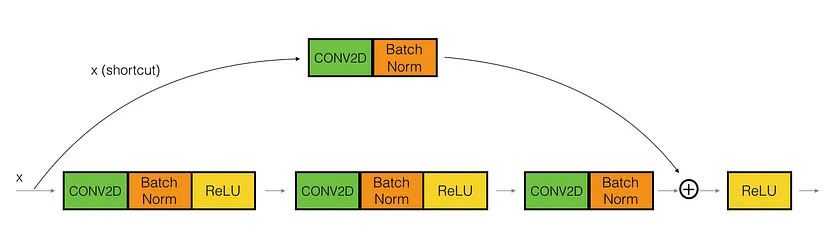

### **3. ResNet Architecture**

#### **3.1. Basic Structure**


- **Initial Layer**: The network starts with a single convolutional layer followed by batch normalization and activation (ReLU). This is often followed by a max-pooling layer.

- **Residual Blocks**: Multiple residual blocks are stacked together. Each block consists of two convolutional layers, batch normalization, and ReLU activation. The output of each block is added to its input via the shortcut connection.

- **Final Layers**: After several residual blocks, the network typically includes a global average pooling layer followed by a dense layer to produce the final classification output.

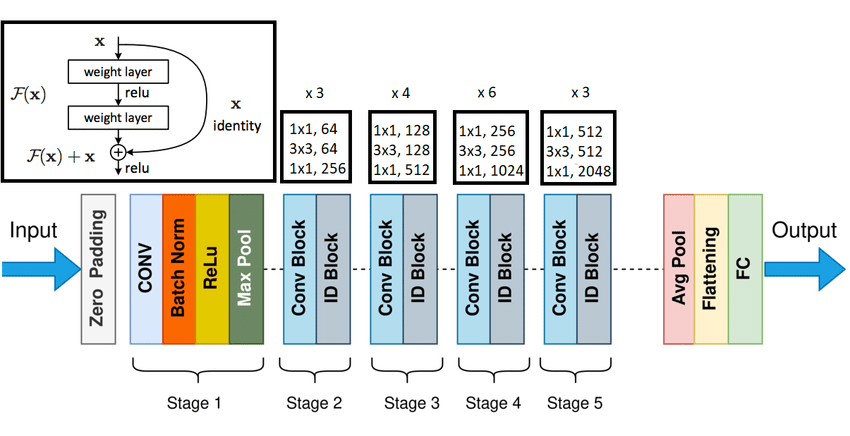

#### **3.2. Convolutional Parameters**

- **Stride**: The stride determines how much the filter moves during the convolution operation. A stride of 1 means the filter moves one pixel at a time, while a stride of 2 means it moves two pixels at a time, reducing the spatial dimensions of the feature map.

- **Padding**: Padding adds extra pixels around the borders of the input image to control the spatial dimensions of the output feature map. Common padding types are 'valid' (no padding) and 'same' (padding such that the output has the same dimensions as the input).

- **Pooling**: Pooling operations, such as max pooling, reduce the spatial dimensions of the feature maps. This helps in reducing computational complexity and controlling overfitting.

### **4. Benefits of ResNet**

- **Easier Training**: Residual connections make it easier to train very deep networks by mitigating the vanishing gradient problem.

- **Improved Accuracy**: ResNet architectures often achieve better accuracy compared to traditional deep networks.

- **Flexibility**: ResNet can be adapted to various tasks and datasets, making it a versatile model for different applications.

### **5. Implementation in Keras**


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1):
    """
    Residual block with optional convolution shortcut.
    """
    # Shortcut path
    shortcut = x

    # Main path
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Add shortcut to main path
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x


In [ ]:
def build_resnet_sequential(input_shape, num_classes):
    model = models.Sequential()
    
    # Initial Convolution
    model.add(layers.Conv2D(64, kernel_size=7, strides=2, padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))
    
    # Residual blocks
    for filters in [64, 128, 256, 512]:
        model.add(residual_block(model.output, filters))
        model.add(residual_block(model.output, filters))
    
    # Global Average Pooling and Output Layer
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Define model parameters
input_shape = (32, 32, 3)
num_classes = 10

# Build the ResNet model
model = build_resnet_sequential(input_shape, num_classes)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=2)


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()